<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# DBSCAN Practice

_Authors: Joseph Nelson (DC)_

---

You're now familiar with how DBSCAN works. Let's practice it in sklearn.

We will start out working with the [NHL data](https://github.com/josephnelson93/GA-DSI/blob/master/NHL_Data_GA.csv). We're going to investigate clustering teams based on their counting stats.

[Check out this glossary of hockey terms for a reference of what the columns indicate.](http://stats.hockeyanalysis.com/glossary.php)

In [16]:
import pandas as pd
from sklearn.cluster import DBSCAN
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

pd.set_option('display.max_columns', 50)

### 1.  Load our data and perform any basic cleaning and/or EDA.


In [3]:
nhl = pd.read_csv('./datasets/nhl.csv')


In [5]:
# A:
nhl.columns = [i.lower() for i in nhl.columns]

In [6]:
nhl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 28 columns):
team    90 non-null object
pts     90 non-null int64
rank    90 non-null int64
toi     90 non-null object
gf      90 non-null int64
ga      90 non-null int64
gf60    90 non-null float64
ga60    90 non-null float64
gf%     90 non-null float64
sf      90 non-null int64
sa      90 non-null int64
sf60    90 non-null float64
sa60    90 non-null float64
sf%     90 non-null float64
ff      90 non-null int64
fa      90 non-null int64
ff60    90 non-null float64
fa60    90 non-null float64
ff%     90 non-null float64
cf      90 non-null int64
ca      90 non-null int64
cf60    90 non-null float64
ca60    90 non-null float64
cf%     90 non-null float64
sh%     90 non-null float64
sv%     90 non-null float64
pdo     90 non-null int64
pim     90 non-null int64
dtypes: float64(14), int64(12), object(2)
memory usage: 19.8+ KB


In [8]:
percent = ['gf%', 'ff%', 'cf%','sh%', 'sv%']
others = [i for i in nhl.columns if i not in percent]

In [9]:
nhl[percent].describe()

,gf%,ff%,cf%,sh%,sv%
count,90.000000,90.000000,90.000000,90.000000,90.000000
mean,49.981111,49.966667,49.972222,7.814556,92.182556
std,4.644554,2.797913,2.844313,0.866942,0.928621
min,38.000000,43.100000,43.700000,5.900000,89.830000
25%,46.825000,47.775000,47.925000,7.235000,91.555000
50%,49.700000,50.050000,50.400000,7.730000,92.250000
75%,53.625000,51.775000,52.000000,8.270000,92.870000
max,61.200000,58.100000,57.100000,10.340000,93.940000


In [12]:
nhl[others].describe()

,pts,rank,gf,ga,gf60,ga60,sf,sa,sf60,sa60,sf%,ff,fa,ff60,fa60,cf,ca,cf60,ca60,pdo,pim
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,91.977778,2.022222,83.288889,83.288889,2.442222,2.444000,1068.333333,1068.333333,31.252222,31.292222,49.956667,1475.377778,1475.377778,43.155556,43.217778,1973.466667,1973.466667,57.735556,57.798889,999.988889,990.966667
std,12.524114,0.820767,10.376339,9.694484,0.325331,0.313522,95.929047,75.514118,2.237637,2.100306,2.793494,129.880116,109.025569,2.951180,3.047105,176.468299,154.148928,4.124476,4.291106,12.292772,178.049321
min,62.000000,1.000000,57.000000,64.000000,1.700000,1.730000,815.000000,868.000000,25.800000,25.800000,43.200000,1138.000000,1151.000000,36.000000,34.200000,1565.000000,1572.000000,49.500000,46.700000,978.000000,689.000000
25%,82.250000,1.000000,76.000000,75.500000,2.232500,2.202500,1011.500000,1022.250000,29.550000,29.800000,48.300000,1380.750000,1409.500000,40.900000,41.350000,1855.250000,1877.000000,54.275000,54.600000,992.000000,881.250000
50%,92.500000,2.000000,84.000000,84.000000,2.400000,2.495000,1072.000000,1072.000000,31.400000,31.500000,50.150000,1474.500000,1477.500000,43.400000,43.450000,1981.500000,1961.000000,58.050000,58.350000,1000.500000,960.000000
75%,102.000000,3.000000,90.000000,89.000000,2.600000,2.670000,1143.000000,1125.750000,32.775000,32.900000,51.675000,1566.250000,1551.000000,45.500000,45.150000,2112.750000,2077.250000,60.850000,60.400000,1007.750000,1101.500000
max,121.000000,3.000000,115.000000,107.000000,3.450000,3.240000,1311.000000,1245.000000,35.600000,35.900000,57.700000,1762.000000,1735.000000,49.500000,50.500000,2341.000000,2332.000000,64.900000,67.500000,1034.000000,1515.000000


In [45]:
nhl.head(1)

,team,pts,rank,toi,gf,ga,gf60,ga60,gf%,sf,sa,sf60,sa60,sf%,ff,fa,ff60,fa60,ff%,cf,ca,cf60,ca60,cf%,sh%,sv%,pdo,pim
0,Washington10,121,1,2001:52:00,115,73,3.45,2.19,61.2,1112,1047,33.3,31.4,51.5,1526,1449,45.7,43.4,51.3,2138,1935,64.1,58.0,52.5,10.34,93.03,1034,1269


### 2. Set up an `X` matrix to perform clustering with DBSCAN.

Let's cluster on all features EXCEPT team and rank.

Make rank be our `y` vector which we can use to do cluster validation. 

In [47]:
# A:
X = nhl[[i for i in nhl.columns if i not in ['team','rank','toi']]]
y = nhl['rank']

### 3. Scatter plot EDA

Make two scatter plots. At least one axis in one of the plots should represent points (goals for, GA). Do we obtain a general idea from the scatter plots of how many clusters we should expect to extract with a clustering algorithm?

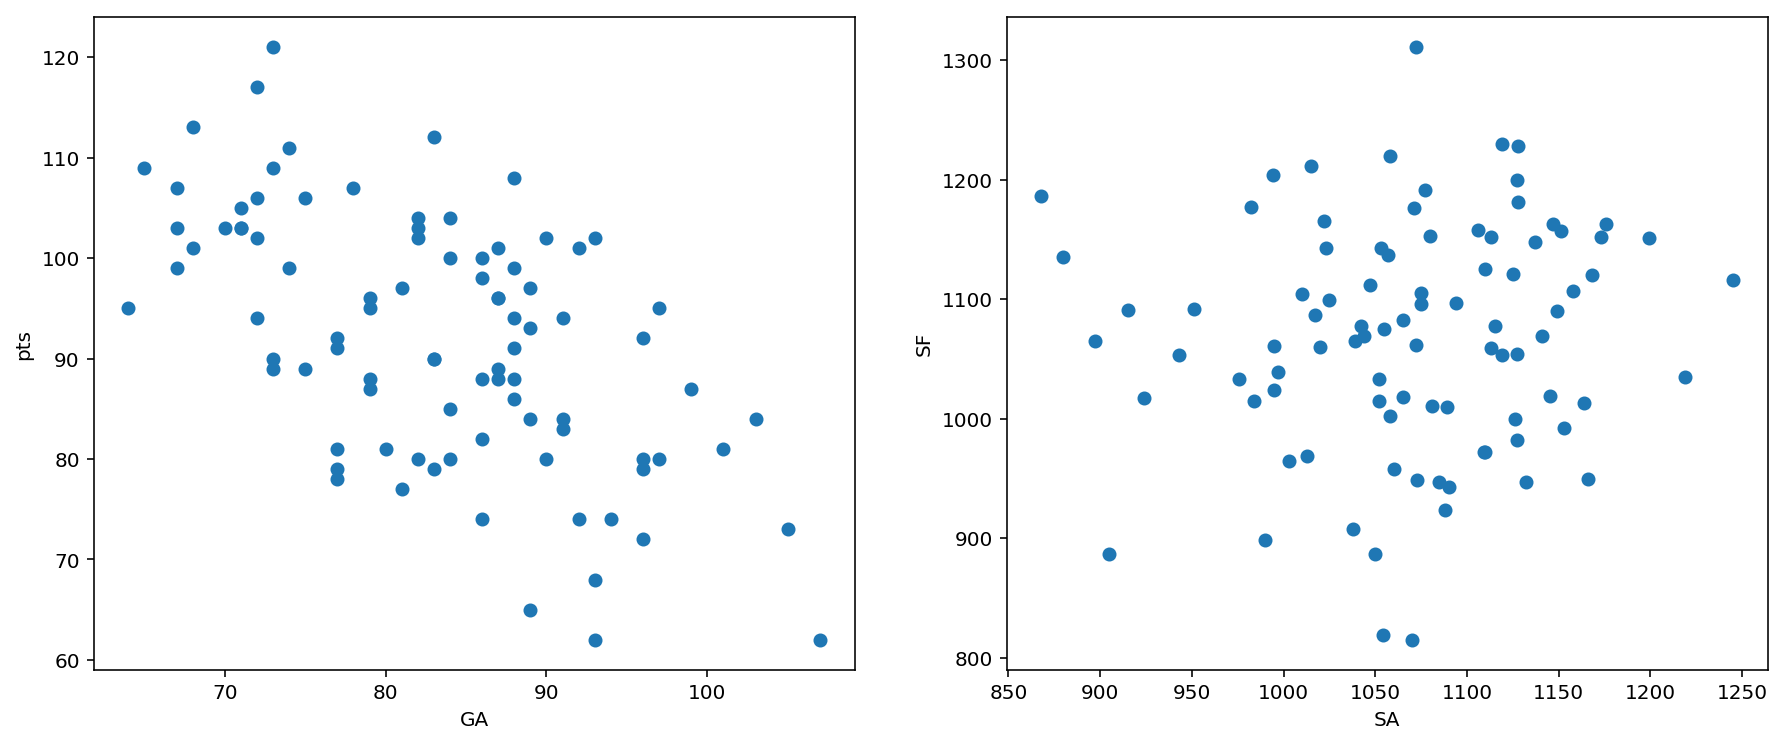

In [169]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,6)) 
ax1.scatter(nhl.ga, nhl.pts)
ax1.set_xlabel('GA')
ax1.set_ylabel('pts')
ax2.scatter(nhl.sa, nhl.sf)
ax2.set_xlabel('SA')
ax2.set_ylabel('SF')

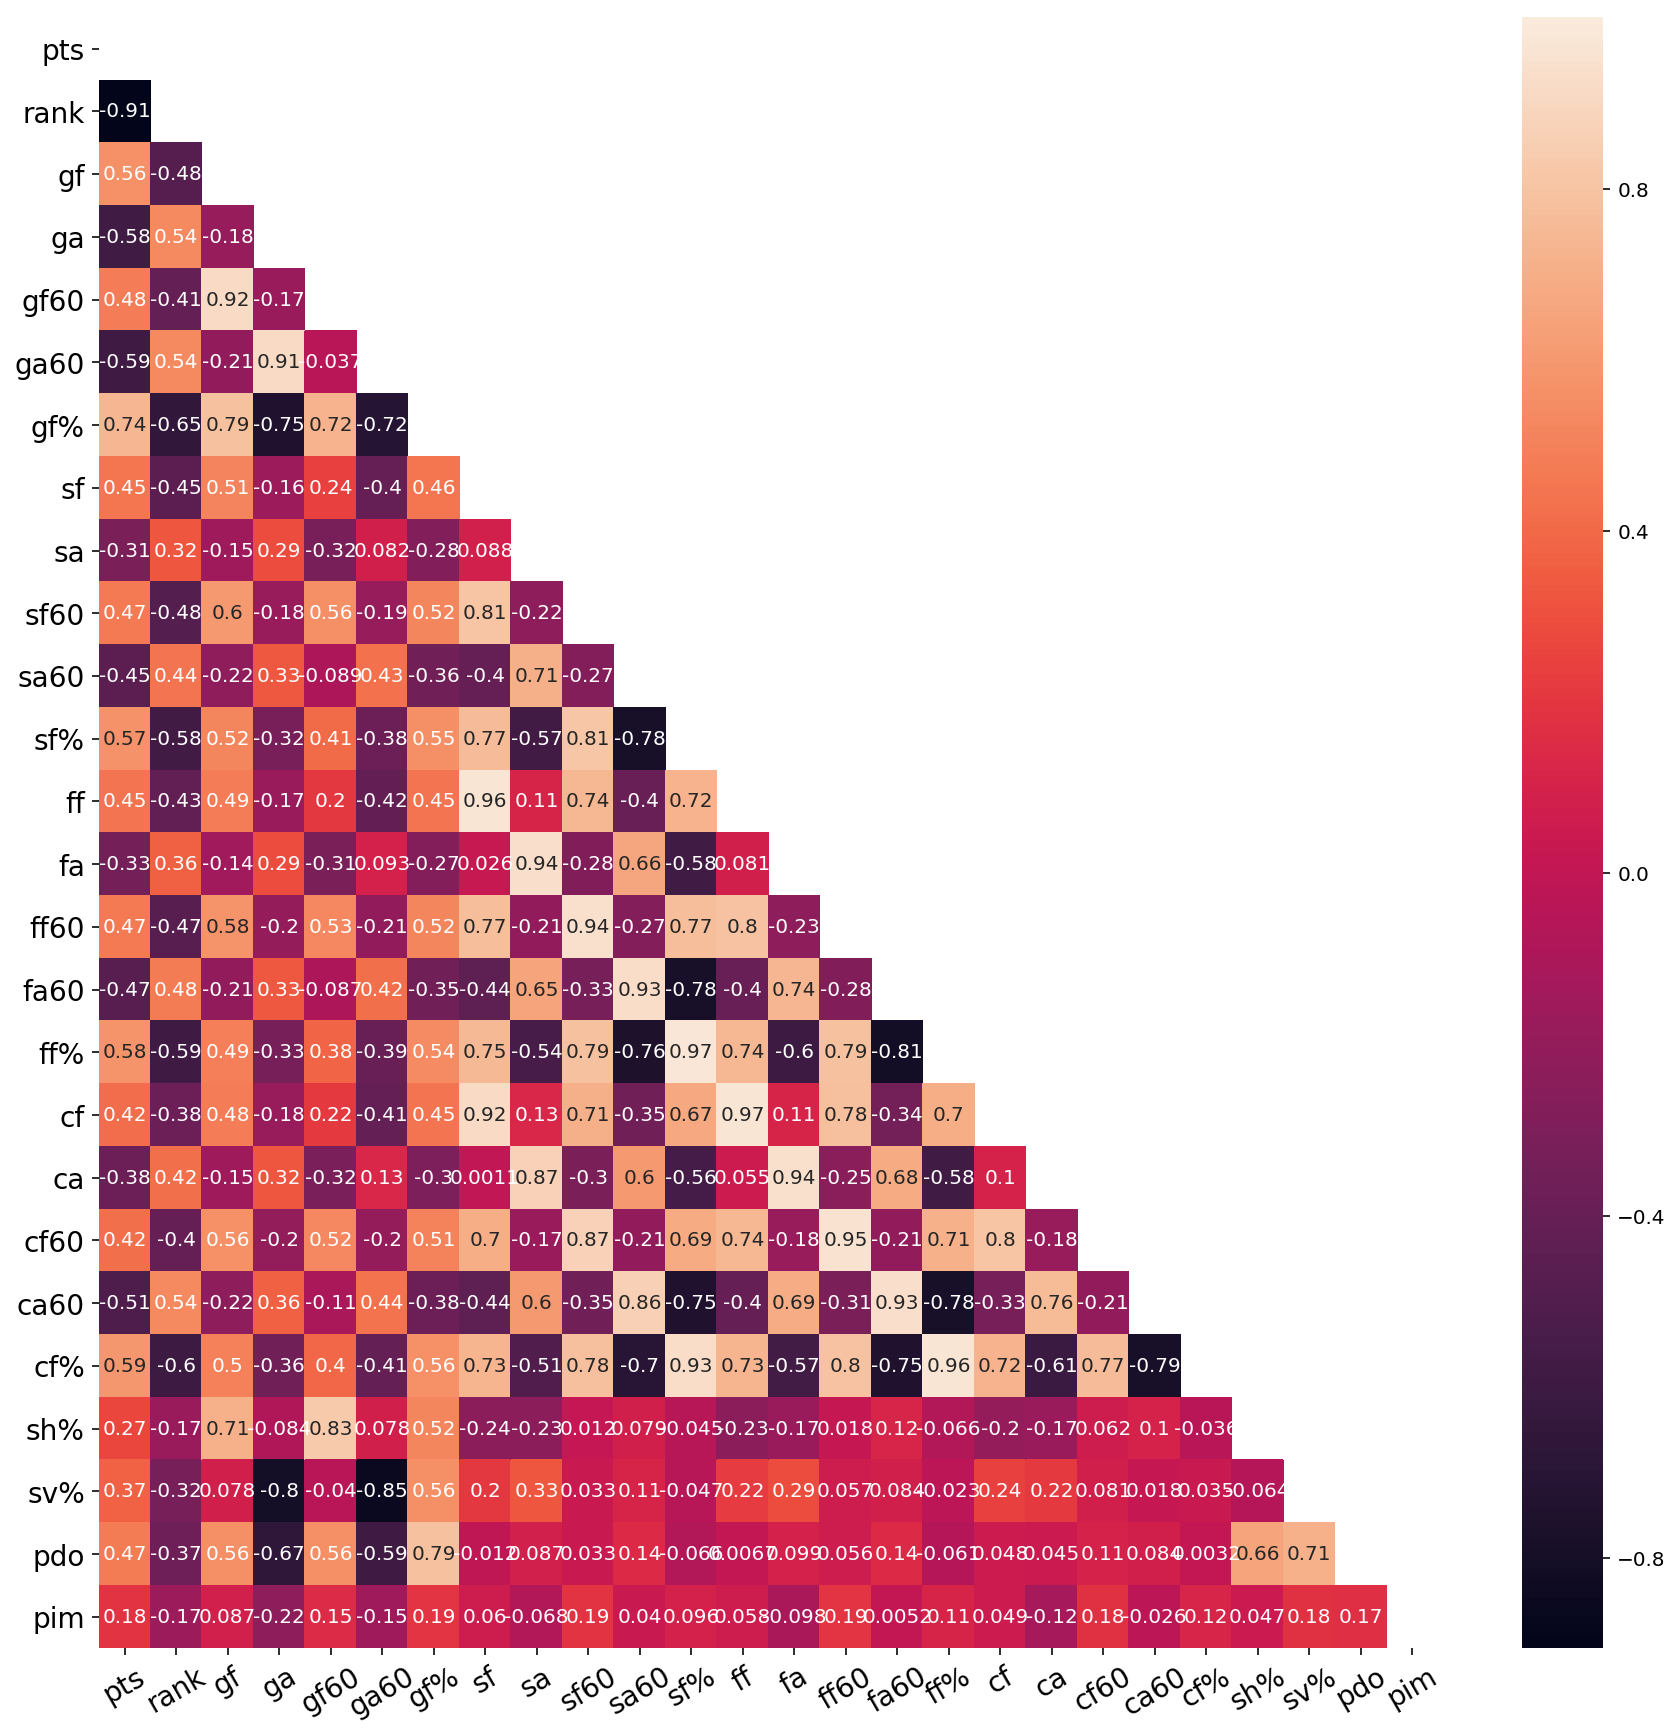

In [48]:
# A:
corrs = nhl.corr()

# Set the default matplotlib figure size:
fig, ax = plt.subplots(figsize=(15,15))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(corrs, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(corrs, mask=mask, annot=True)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=30)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

## 4. Scale our data

Standardize the data and compare at least one of the scatterplots for the scaled data to unscaled above.

In [49]:
# A:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xs = ss.fit_transform(X)

In [53]:
Xs_df = pd.DataFrame(Xs, columns = [i for i in nhl.columns if i not in ['team','rank','toi']])
Xs_df.head(1)

,pts,gf,ga,gf60,ga60,gf%,sf,sa,sf60,sa60,sf%,ff,fa,ff60,fa60,ff%,cf,ca,cf60,ca60,cf%,sh%,sv%,pdo,pim
0,2.33029,3.073219,-1.067259,3.115059,-0.814689,2.429025,0.457748,-0.284091,0.920279,0.051603,0.555569,0.391945,-0.243297,0.867009,0.060137,0.479215,0.937591,-0.25094,1.551736,0.04713,0.893692,2.929367,0.917697,2.782257,1.570301


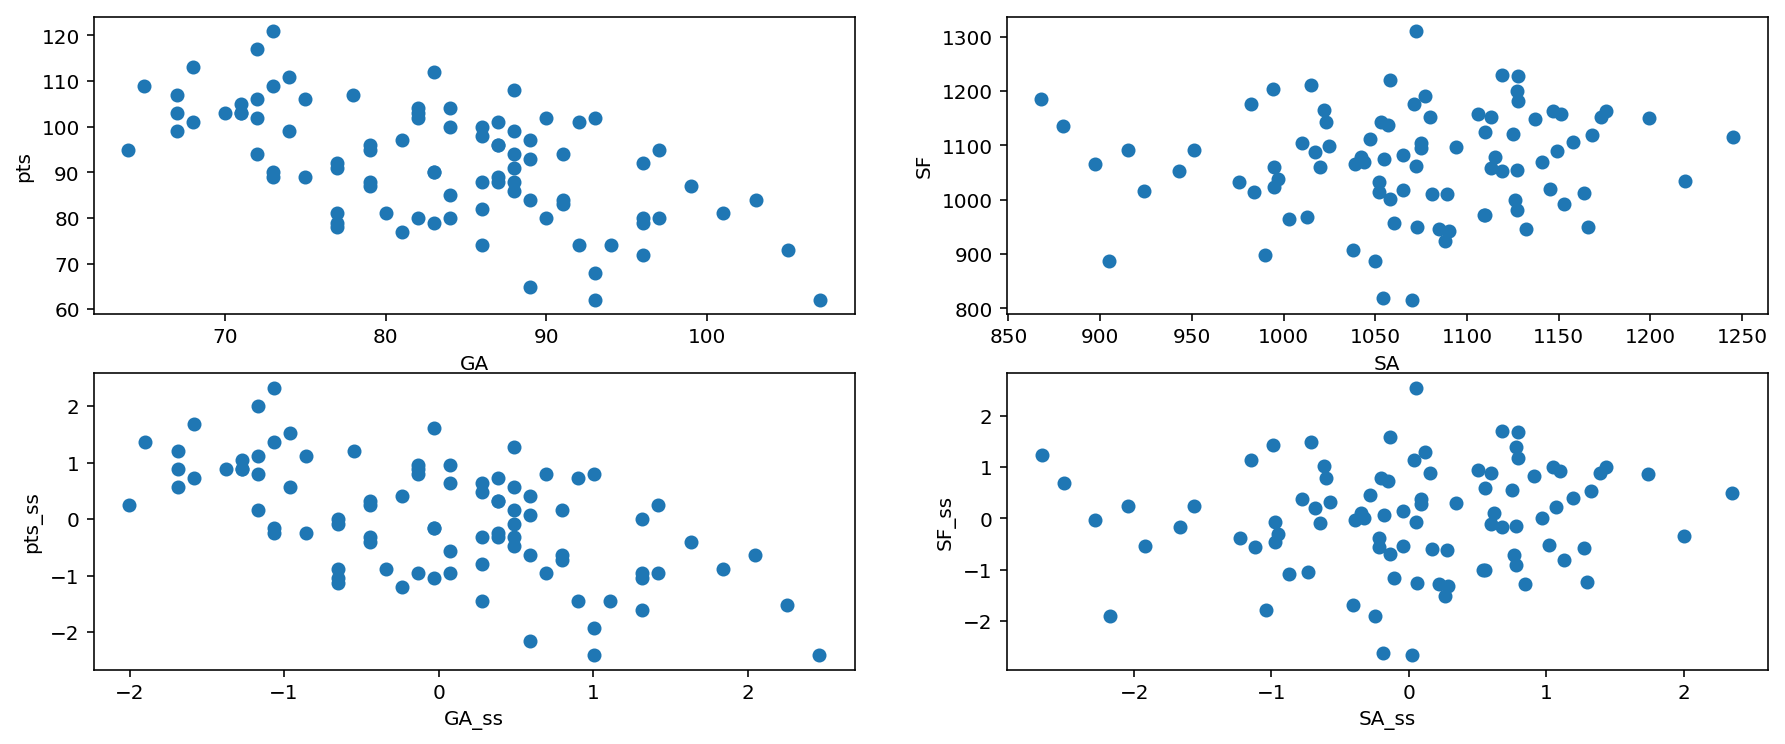

In [171]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2, figsize = (15,6)) 
ax1.scatter(nhl.ga, nhl.pts)
ax1.set_xlabel('GA')
ax1.set_ylabel('pts')
ax2.scatter(nhl.sa, nhl.sf)
ax2.set_xlabel('SA')
ax2.set_ylabel('SF')
ax3.scatter(Xs_df.ga, Xs_df.pts)
ax3.set_xlabel('GA_ss')
ax3.set_ylabel('pts_ss')
ax4.scatter(Xs_df.sa, Xs_df.sf)
ax4.set_xlabel('SA_ss')
ax4.set_ylabel('SF_ss')

### 5. Fit a DBSCAN clusterer

Remember to pass an `eps` and `min_samples` of your choice.

In [55]:
nhl.shape

(90, 28)

In [162]:
# A:
db = DBSCAN(eps= 3, min_samples=4).fit(Xs)

### 6. Check out the assigned cluster labels

Using the `.labels_` command on our DBSCAN class

In [163]:
labels = db.labels_
pd.Series(labels).unique()

array([-1,  0,  1,  3,  2])

### 7. Evaluate the DBSCAN clusters

**7.1 Check the silhouette score.**

How are the clusters?

If you're feeling adventurous, see how you can adjust our epsilon and min_points to improve this.

In [164]:
# A:
from sklearn.metrics import silhouette_score

In [165]:
score = silhouette_score(Xs, labels, random_state = 0)
score

-0.13295172229822017

**7.2 Check the homogeneity, completeness, and V-measure against the stored rank `y`**

In [10]:
# A:

### 8. Plot the clusters

You can choose any two variables for the axes.

In [173]:
Xs_df['predict'] = labels

In [177]:
Xs_df.columns

Index([u'pts', u'gf', u'ga', u'gf60', u'ga60', u'gf%', u'sf', u'sa', u'sf60',
       u'sa60', u'sf%', u'ff', u'fa', u'ff60', u'fa60', u'ff%', u'cf', u'ca',
       u'cf60', u'ca60', u'cf%', u'sh%', u'sv%', u'pdo', u'pim', u'predict'],
      dtype='object')

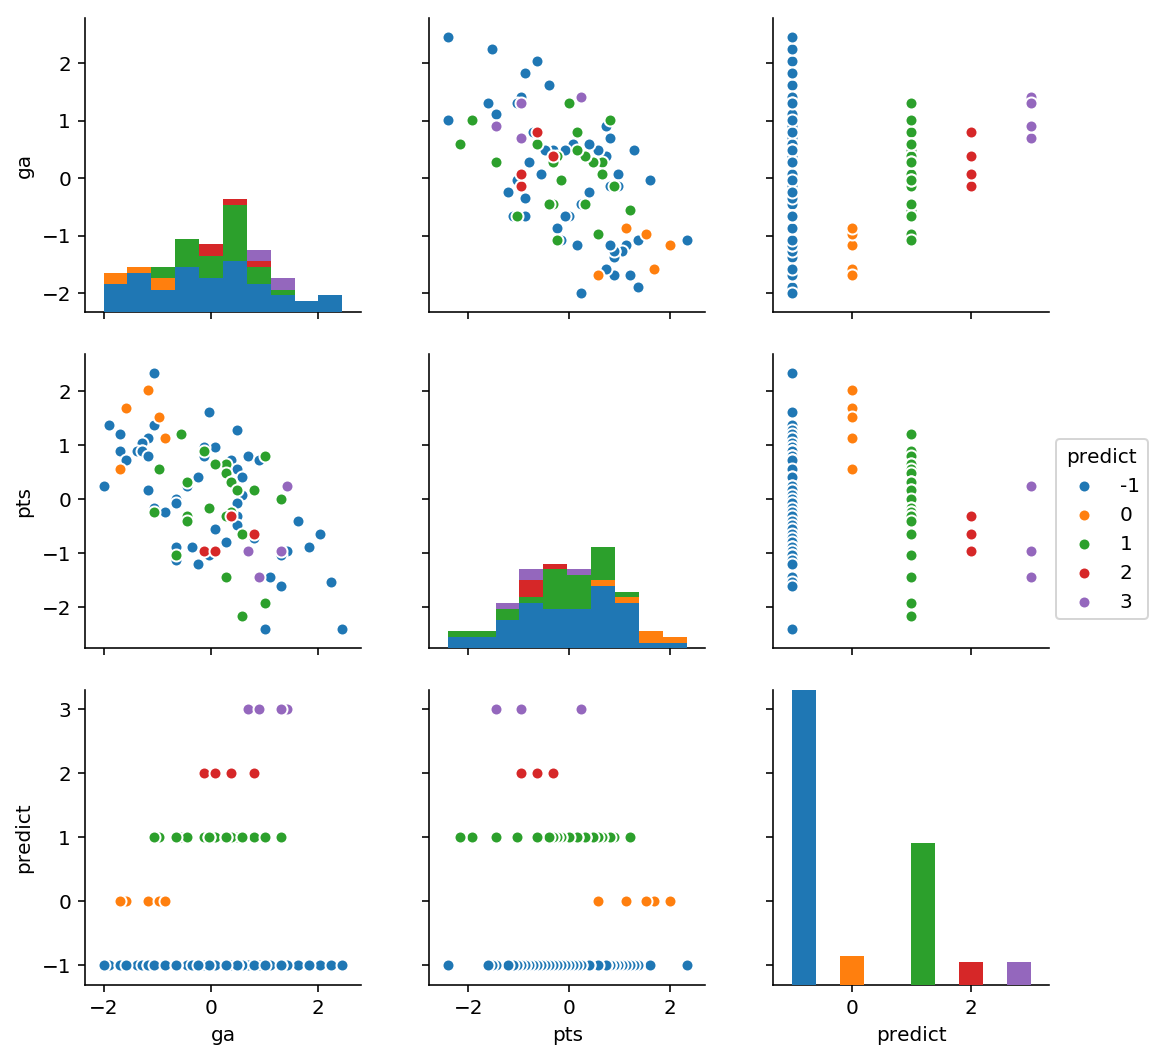

In [179]:
sns.pairplot(Xs_df[['ga','pts','predict']], hue = 'predict')

### 9. Fit DBSCAN on an easier dataset

Import the `make_circles` function from `sklearn.datasets`. You can use this to create some fake clusters that will perform well with DBSCAN.

Create some `X` and `y` using the function. Here is some sample code:
```python
from sklearn.datasets import make_circles
circles_X, circles_y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
```

**9.1 Plot the fake circles data.**

In [166]:
# A:
from sklearn.datasets import make_circles
circles_X, circles_y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

**9.2 Scale the data and fit DBSCAN on it.**

In [167]:
# A:
circles_Xs = ss.fit_transform(circles_X)



**9.3 Evaluate DBSCAN visually, with silhouette, and with the metrics against the true `y`.**

In [14]:
# A: